In [192]:
# this notebook is used to create the visualizations. intended to make the visualization creation process transparent
# not every visualization will look the exact same as in the main paper since the neural network used is non-deterministic

In [193]:
import pandas as pd
from ipycanvas import Canvas, hold_canvas
import numpy as np
from pathlib import Path
from Player import Player
from Route import Route
import Metric
import Model
import os
from FindGameFiles import FindGameFiles
import PermHelpers
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [194]:
# goes through the files and accumulates relevant plays
Route.find_all_relevant([Metric.statcast_jump, Metric.route_efficiency])

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 11 of 339
Finished game 21 of 339
Finished game 31 of 339
Finished game 41 of 339
Finished game 51 of 339
Finished game 61 of 339
Finished game 71 of 339
Finished game 81 of 339
Finished game 91 of 339
Finished game 101 of 339
Finished game 111 of 339
no start coords
game skipped
Finished game 121 of 339
Finished game 131 of 339
Finished game 141 of 339
Finished game 151 of 339
Finished game 161 of 339
Finished game 171 of 339
Finished game 181 of 339
Finished game 191 of 339
Finished game 201 of 339
Finished game 211 of 339
Finished game 221 of 339
Finished game 231 of 339
Finished game 241 of 339
Finished game 251 of 339
Finished game 261 of 339
Finished game 271 of 339
Finished game 281 of 339
Finished game 291 of 339
Finished game 301 of 339
Finished game 311 of 339
Finished game 321 of 339
Finished game 331 of 339


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:84: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  relevant = pd.read_csv(game[3]).groupby("play_id").filter(Route.is_relevant())


True

In [195]:
all_routes_df = Route.get_all_routes_df()

In [196]:
# adds hang time to table
with_hang_time = all_routes_df.copy(deep = True)
with_hang_time["hang_time"] = with_hang_time["route_obj"].apply(lambda x: x.get_hang_time())

# adds whether or not each play was caught
with_caught = with_hang_time.copy(deep = True)
with_caught["was_caught"] = with_caught["route_obj"].apply(lambda x: x.get_was_caught())

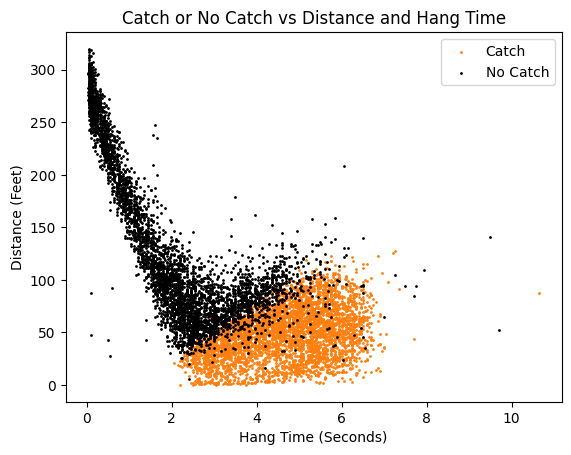

In [197]:
fig, ax = plt.subplots()
for color in ["tab:orange", "black"]:
    if color == "tab:orange":
        df = with_caught[with_caught["was_caught"]]
        ax.scatter(df["hang_time"] / 1000, df["bounce_dist"], c=color, s=1, label="Catch")
    else:
        df = with_caught[-with_caught["was_caught"]]
        ax.scatter(df["hang_time"] / 1000, df["bounce_dist"], c=color, s=1, label="No Catch")

ax.legend()
ax.set_xlabel("Hang Time (Seconds)")
ax.set_ylabel("Distance (Feet)")
ax.set_title("Catch or No Catch vs Distance and Hang Time")

plt.show()

In [198]:
subroutes = Route.get_all_subroutes_df()

c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  rdf["quarter_sec_velo"].iloc[-1] = rdf["distance_remaining"].iloc[-2] * 4
c:\Users\Owner\Desktop\coding stuff\smt data challen

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:458: RuntimeWarning: invalid value encountered in divide
  rdf["quarter_sec_velo"] = np.sum(a*b, axis = 1) / np.linalg.norm(list(zip(land_coords[0] - rdf["field_x"], land_coords[1] - rdf["field_y"])), axis =1 ) * 4
c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:461: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the origi

hi
hi
hi


In [199]:
cont_mod = Model.create_cont_model(subroutes)

In [200]:
with_pred = pd.concat([subroutes.reset_index(), pd.DataFrame(cont_mod.predict_proba(subroutes))], axis = 1)

In [201]:
with_pred["pred"] = np.round(with_pred[1] * 20) / 20
with_pred = with_pred.drop(columns = ["index"])

In [202]:
with_pred["unique_id"] = with_pred["route_obj"] == with_pred["route_obj"].shift(1)
with_pred["unique_id"] = with_pred["unique_id"].apply(lambda x: np.nan if x else 1)
with_pred["unique_id"] = (with_pred["unique_id"] * range(with_pred.shape[0])).ffill()

In [203]:
with_pred["new"] = with_pred["unique_id"] != with_pred["unique_id"].shift(1)

In [204]:
with_pred.groupby("unique_id").filter(lambda x: x["pred"].iloc[0] < .60 and x["pred"].iloc[0] > .40 and x["quarter_sec_velo"].iloc[1] < 0 and x["was_caught"].iloc[0])

route_obj  distance_remaining  \
70496  <Route.Route object at 0x000001A0EE5143D0>           75.265914   
70497  <Route.Route object at 0x000001A0EE5143D0>           75.364624   
70498  <Route.Route object at 0x000001A0EE5143D0>           75.463123   
70499  <Route.Route object at 0x000001A0EE5143D0>           75.562006   
70500  <Route.Route object at 0x000001A0EE5143D0>           74.938182   
70501  <Route.Route object at 0x000001A0EE5143D0>           74.017748   
70502  <Route.Route object at 0x000001A0EE5143D0>           72.800476   
70503  <Route.Route object at 0x000001A0EE5143D0>           71.216898   
70504  <Route.Route object at 0x000001A0EE5143D0>           69.276022   
70505  <Route.Route object at 0x000001A0EE5143D0>           66.983207   
70506  <Route.Route object at 0x000001A0EE5143D0>           64.400882   
70507  <Route.Route object at 0x000001A0EE5143D0>           61.630972   
70508  <Route.Route object at 0x000001A0EE5143D0>           58.784559   
70509  <Route.Route object at 0x000001A0EE5143D0>           55.943699   
70510  <Route.Route object at 0x000001A0EE5143D0>           50.763628   
70511  <Route.Route object at 0x000001A0EE5143D0>           45.583738   
70512  <Route.Route object at 0x000001A0EE5143D0>           40.403667   
70513  <Route.Route object at 0x000001A0EE5143D0>           35.223879   
70514  <Route.Route object at 0x000001A0EE5143D0>           30.043706   
70515  <Route.Route object at 0x000001A0EE5143D0>           24.863918   
70516  <Route.Route object at 0x000001A0EE5143D0>           19.683847   
70517  <Route.Route object at 0x000001A0EE5143D0>           14.503776   
70518  <Route.Route object at 0x000001A0EE5143D0>            9.323886   
70519  <Route.Route object at 0x000001A0EE5143D0>            4.143815   

       hang_time_remaining updated_direction  quarter_sec_velo  was_caught  \
70496                 3927              back          0.000000        True   
70497                 3762              back         -0.395015        True   
70498                 3597              back         -0.394166        True   
70499                 3432              back         -0.395702        True   
70500                 3267              back          2.447712        True   
70501                 3102              back          3.603625        True   
70502                 2937              back          4.787126        True   
70503                 2772              back          6.251936        True   
70504                 2607              back          7.684451        True   
70505                 2442              back          9.098101        True   
70506                 2277              back         10.258616        True   
70507                 2112              back         11.006501        True   
70508                 1947              back         11.305122        True   
70509                 1782              back         11.271821        True   
70510                 1617              back         20.720283        True   
70511                 1452              back         20.719561        True   
70512                 1287              back         20.720283        True   
70513                 1122              back         20.719154        True   
70514                  957              back         20.720690        True   
70515                  792              back         20.719154        True   
70516                  627              back         20.720283        True   
70517                  462              back         20.720283        True   
70518                  297              back         20.719561        True   
70519                  132              back         20.720283        True   

              0         1  pred  unique_id    new  
70496  0.554874  0.445126  0.45    70496.0   True  
70497  0.749967  0.250033  0.25    70496.0  False  
70498  0.873994  0.126006  0.15    70496.0  False  
70499  0.952617  0.047383  0.05    70496.0  False  
705

route_obj  \
hang_time_remaining                                               
0.00                 <Route.Route object at 0x000001A11B478790>   
0.25                 <Route.Route object at 0x000001A11B478790>   
0.50                 <Route.Route object at 0x000001A11B478790>   
0.75                 <Route.Route object at 0x000001A11B478790>   
1.00                 <Route.Route object at 0x000001A11B478790>   
1.25                 <Route.Route object at 0x000001A11B478790>   
1.50                 <Route.Route object at 0x000001A11B478790>   
1.75                 <Route.Route object at 0x000001A11B478790>   
2.00                 <Route.Route object at 0x000001A11B478790>   
2.25                 <Route.Route object at 0x000001A11B478790>   
2.50                 <Route.Route object at 0x000001A11B478790>   
2.75                 <Route.Route object at 0x000001A11B478790>   
3.00                 <Route.Route object at 0x000001A11B478790>   
3.25                 <Route.Route object at 0x000001A11B478790>   
3.50                 <Route.Route object at 0x000001A11B478790>   
3.75                 <Route.Route object at 0x000001A11B478790>   
4.00                 <Route.Route object at 0x000001A11B478790>   
4.25                 <Route.Route object at 0x000001A11B478790>   
4.50                 <Route.Route object at 0x000001A11B478790>   
4.75                 <Route.Route object at 0x000001A11B478790>   
5.00                 <Route.Route object at 0x000001A11B478790>   
5.25                 <Route.Route object at 0x000001A11B478790>   

                     distance_remaining  hang_time_remaining  \
hang_time_remaining                                            
0.00                          99.210284                 5250   
0.25                          99.974244                 5000   
0.50                         100.360641                 4750   
0.75                         100.002487                 4500   
1.00                          98.465393                 4250   
1.25                          95.592382                 4000   
1.50                          91.525292                 3750   
1.75                          86.561507                 3500   
2.00                          81.012602                 3250   
2.25                          75.109539                 3000   
2.50                          69.000171                 2750   
2.75                          62.819918                 2500   
3.00                          56.781167                 2250   
3.25                          49.885561                 2000   
3.50                          45.430804                 1750   
3.75                          39.891932                 1500   
4.00                          33.632310                 1250   
4.25                          26.905631                 1000   
4.50                          20.179199                  750   
4.75                          13.452815                  500   
5.00                           6.726383                  250   
5.25                           0.000000                    0   

                    updated_direction  quarter_sec_velo  was_caught         0  \
hang_time_remaining                                                             
0.00                             back          0.000000        True  0.382897   
0.25                             back         -3.058589        True  0.756035   
0.50                             back         -1.551634        True  0.868516   
0.75                             back          1.420002        True  0.846429   
1.00                             back          6.129398        True  0.614269   
1.25                             back         11.471854        True  0.454507   
1.50                             back         16.252649        True  0.358794   
1.75                             back         19.846087        True  0.197325   
2.00                             back         22.192131        True  0.132049   
2.25             

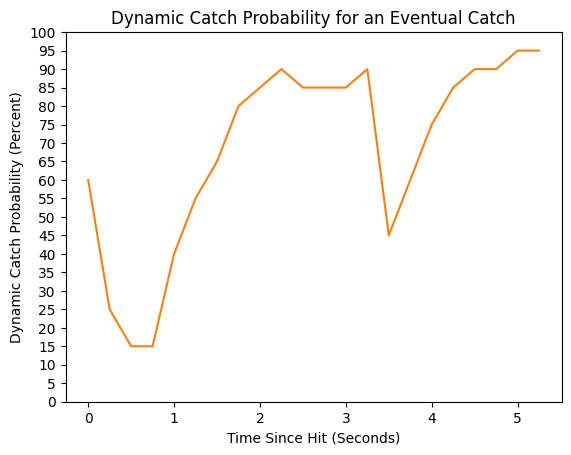

In [205]:
example_id1 = 120131
example_id2 = 123527
ex1df = with_pred[with_pred["unique_id"] == example_id1]
ex1df.index = (ex1df["hang_time_remaining"].iloc[0] - ex1df["hang_time_remaining"]) / 1000
fig, ax = plt.subplots()
ax.plot(ex1df["pred"] * 100, c = "tab:orange")
ax.set_xlabel("Time Since Hit (Seconds)")
ax.set_ylabel("Dynamic Catch Probability (Percent)")
ax.set_title("Dynamic Catch Probability for an Eventual Catch")
ax.set_yticks(np.arange(0, 101, 5))
ex1df

MovieWriter imagemagick unavailable; using Pillow instead.


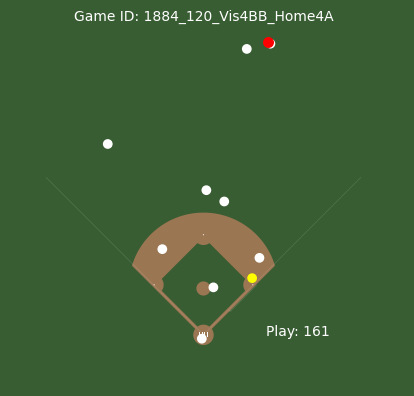

In [206]:
with_pred[with_pred["unique_id"] == example_id1]["route_obj"].iloc[0].visualize(save = True)

route_obj  \
hang_time_remaining                                               
0.00                 <Route.Route object at 0x000001A11DD03B20>   
0.25                 <Route.Route object at 0x000001A11DD03B20>   
0.50                 <Route.Route object at 0x000001A11DD03B20>   
0.75                 <Route.Route object at 0x000001A11DD03B20>   
1.00                 <Route.Route object at 0x000001A11DD03B20>   
1.25                 <Route.Route object at 0x000001A11DD03B20>   
1.50                 <Route.Route object at 0x000001A11DD03B20>   
1.75                 <Route.Route object at 0x000001A11DD03B20>   
2.00                 <Route.Route object at 0x000001A11DD03B20>   
2.25                 <Route.Route object at 0x000001A11DD03B20>   
2.50                 <Route.Route object at 0x000001A11DD03B20>   
2.75                 <Route.Route object at 0x000001A11DD03B20>   

                     distance_remaining  hang_time_remaining  \
hang_time_remaining                                            
0.00                          47.949461                 2750   
0.25                          47.466420                 2500   
0.50                          46.683959                 2250   
0.75                          45.608567                 2000   
1.00                          43.047686                 1750   
1.25                          40.249588                 1500   
1.50                          37.970313                 1250   
1.75                          36.369168                 1000   
2.00                          35.373509                  750   
2.25                          35.032685                  500   
2.50                          35.219722                  250   
2.75                          35.696276                    0   

                    updated_direction  quarter_sec_velo  was_caught         0  \
hang_time_remaining                                                             
0.00                            right          0.000000       False  0.526670   
0.25                            right          1.932087       False  0.548709   
0.50                            right          3.129057       False  0.747103   
0.75                            right          4.294992       False  0.900905   
1.00                            right         10.096496       False  0.792257   
1.25                            right         10.946491       False  0.946800   
1.50                            right          8.500667       False  0.999083   
1.75                            right          5.345179       False  0.999997   
2.00                            right          2.700343       False  1.000000   
2.25                          forward         -0.083075       False  1.000000   
2.50                          forward         -2.225143       False  1.000000   
2.75                          forward         -3.287051       False  1.000000   

                                1  pred  unique_id    new  
hang_time_remaining                                        
0.00                 4.733300e-01  0.45   123527.0   True  
0.25                 4.512913e-01  0.45   123527.0  False  
0.50                 2.528968e-01  0.25   123527.0  False  
0.75                 9.909528e-02  0.10   123527.0  False  
1.00                 2.077434e-01  0.20   123527.0  False  
1.25                 5.320037e-02  0.05   123527.0  False  
1.50                 9.166720e-04  0.00   123527.0  False  
1.75                 2.536071e-06  0.00   123527.0  False  
2.00                 3.165312e-09  0.00   123527.0  False  
2.25                 3.147339e-13  0.00   123527.0  False  
2.50                 1.720501e-16  0.00   123527.0  False  
2.75                 9.132728e-20  0.00   123527.0  False

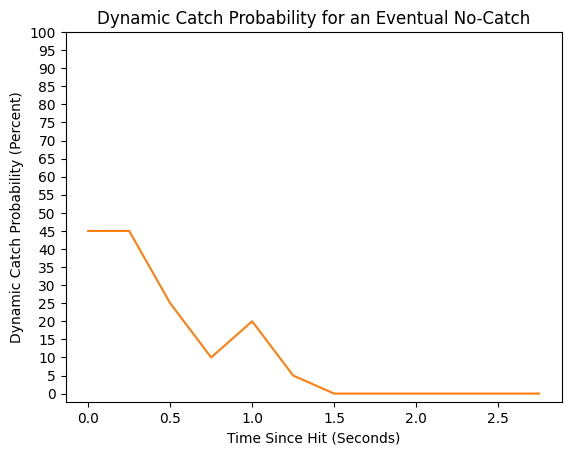

In [207]:
ex2df = with_pred[with_pred["unique_id"] == example_id2]
ex2df.index = (ex2df["hang_time_remaining"].iloc[0] - ex2df["hang_time_remaining"]) / 1000
fig, ax = plt.subplots()
ax.plot(ex2df["pred"] * 100, c = "tab:orange")
ax.set_xlabel("Time Since Hit (Seconds)")
ax.set_ylabel("Dynamic Catch Probability (Percent)")
ax.set_title("Dynamic Catch Probability for an Eventual No-Catch")
ax.set_yticks(np.arange(0, 101, 5))
ex2df

MovieWriter imagemagick unavailable; using Pillow instead.


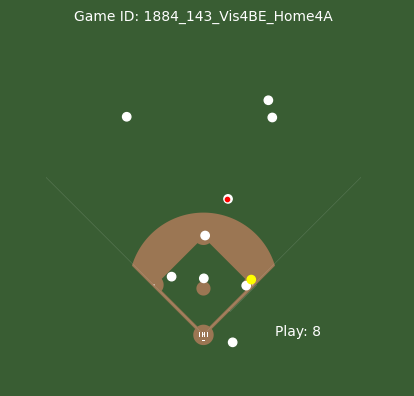

In [208]:
with_pred[with_pred["unique_id"] == example_id2]["route_obj"].iloc[0].visualize(save = True)

In [209]:
with_pred["orig_hang_time"] = with_pred["hang_time_remaining"] * with_pred["new"].apply(lambda x: 1 if x else np.nan)
with_pred["orig_hang_time"] = with_pred["orig_hang_time"].ffill()
with_pred["time_elapsed"] = with_pred["orig_hang_time"] - with_pred["hang_time_remaining"]

C:\Users\Owner\AppData\Local\Temp\ipykernel_24168\1101056845.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  with_pred[(with_pred["orig_hang_time"] < 8000)][["unique_id", "time_elapsed", "pred", "orig_hang_time"]].groupby("unique_id").apply(lambda x: ax.plot(x["time_elapsed"] / 1000, x["pred"] * 100, c = "black", alpha = 0.01))


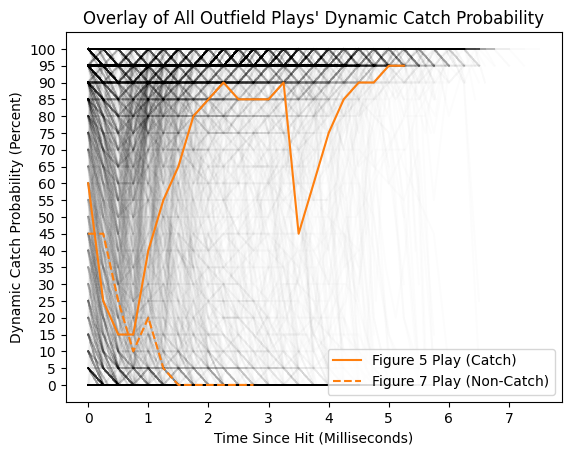

In [303]:
fig, ax = plt.subplots()
with_pred[(with_pred["orig_hang_time"] < 8000)][["unique_id", "time_elapsed", "pred", "orig_hang_time"]].groupby("unique_id").apply(lambda x: ax.plot(x["time_elapsed"] / 1000, x["pred"] * 100, c = "black", alpha = 0.01))
ax.plot(with_pred[with_pred["unique_id"] == example_id1]["time_elapsed"] / 1000, with_pred[with_pred["unique_id"] == example_id1]["pred"] * 100, color = "tab:orange", linestyle = "-", label = "Figure 5 Play (Catch)")
ax.plot(with_pred[with_pred["unique_id"] == example_id2]["time_elapsed"] / 1000, with_pred[with_pred["unique_id"] == example_id2]["pred"] * 100, color = "tab:orange", linestyle = "--", label = "Figure 7 Play (Non-Catch)")
ax.set_title("Overlay of All Outfield Plays' Dynamic Catch Probability")
ax.set_xlabel("Time Since Hit (Milliseconds)")
ax.set_yticks(np.arange(0, 101, 5))
ax.set_ylabel("Dynamic Catch Probability (Percent)")
ax.legend(loc = "lower right")

C:\Users\Owner\AppData\Local\Temp\ipykernel_24168\112283889.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  with_pred[(with_pred["orig_hang_time"] <= 5000) & (with_pred["orig_hang_time"] >= 4000)][["unique_id", "time_elapsed", "pred", "orig_hang_time"]].groupby("unique_id").apply(lambda x: ax.plot(x["time_elapsed"] / 1000, x["pred"] * 100, c = "black", alpha = 0.01))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


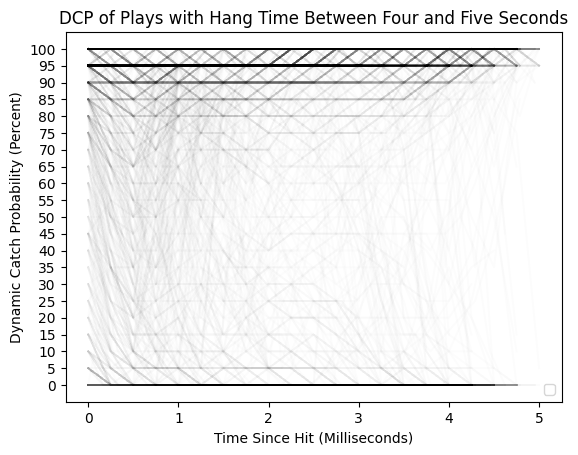

In [305]:
fig, ax = plt.subplots()
with_pred[(with_pred["orig_hang_time"] <= 5000) & (with_pred["orig_hang_time"] >= 4000)][["unique_id", "time_elapsed", "pred", "orig_hang_time"]].groupby("unique_id").apply(lambda x: ax.plot(x["time_elapsed"] / 1000, x["pred"] * 100, c = "black", alpha = 0.01))
ax.set_title("DCP of Plays with Hang Time Between Four and Five Seconds")
ax.set_xlabel("Time Since Hit (Milliseconds)")
ax.set_yticks(np.arange(0, 101, 5))
ax.set_ylabel("Dynamic Catch Probability (Percent)")
ax.legend(loc = "lower right")

In [211]:
mlbjumps = pd.read_csv("jump.csv")
mlbspeeds = pd.read_csv("sprint_speed.csv")

In [212]:
jump_and_speed = mlbjumps.merge(mlbspeeds, on = "last_name, first_name")

In [213]:
jump_and_speed.sort_values("outs_above_average")

last_name, first_name  resp_fielder_id  year  outs_above_average  \
56        Marte, Starling           516782  2024                  -9   
33         García, Adolis           666969  2024                  -7   
2         Andujar, Miguel           609280  2024                  -7   
3        Arozarena, Randy           668227  2024                  -7   
72      Profar, Jurickson           595777  2024                  -7   
..                    ...              ...   ...                 ...   
50       Kiermaier, Kevin           595281  2024                   8   
87             Siri, Jose           642350  2024                   9   
100       Varsho, Daulton           662139  2024                  10   
86         Siani, Michael           672279  2024                  12   
106          Young, Jacob           696285  2024                  14   

     outs_per_play  rel_league_burst_distance  rel_league_reaction_distance  \
56            30.0                       -1.1                          -0.7   
33            30.0                       -0.8                           0.1   
2             25.8                       -1.8                           1.5   
3             34.0                       -1.8                          -0.5   
72            32.6                       -1.9                           0.1   
..             ...                        ...                           ...   
50            77.3                        2.2                           0.8   
87            72.7                        2.2                           1.3   
100           67.2                        2.1                           1.6   
86            83.0                        2.0                           1.7   
106           76.2                        1.7                           4.5   

     rel_league_routing_distance  rel_league_bootup_distance  \
56                           0.4                        -1.5   
33                          -0.2                        -0.8   
2                           -1.8                        -2.1   
3                            0.2                        -2.0   
72                          -0.5                        -2.4   
..                           ...                         ...   
50                           0.5                         3.5   
87                          -0.3                         3.2   
100                          0.1                         3.8   
86                          -0.6                         3.1   
106                         -2.8                         3.4   

     f_bootup_distance  ...  n_outs  player_id  team_id  team position age  \
56                32.0  ...       9     516782      121   NYM       RF  35   
33                33.1  ...      12     666969      140   TEX       RF  31   
2                 32.0  ...       8     609280      133   OAK       LF  29   
3                 31.4  ...      17     668227      136   SEA       LF  29   
72                30.4  ...      14     595777      135    SD       LF  31   
..                 ...  ...     ...        ...      ...   ...      ...  ..   
50                38.4  ...      34     595281      119   LAD       CF  34   
87                38.2  ...      40     642350      139    TB       CF  28   
100               37.8  ...      45     662139      141   TOR       LF  27   
86                37.4  ...      39     672279      138   STL       CF  24   
106               38.2  ...      48     696285      120   WSH       CF  24   

     competitive_runs  bolts  hp_to_1b  sprint_speed  
56                108    3.0      4.36          26.7  
33                136    NaN      4.54          26.6  
2                 117    NaN      4.64          26.4  
3                 138    4.0      4.33          28.0  
72                148    NaN      4.44          26.3  
..                ...    ...       ...           ...  
50                 86    NaN      4.29          28.6  
87                 89   28.0      4.22      

In [214]:
jump_and_speed.sort_values("rel_league_bootup_distance")

last_name, first_name  resp_fielder_id  year  outs_above_average  \
103         Winker, Jesse           608385  2024                  -6   
47           Judge, Aaron           592450  2024                  -5   
31         Freeman, Tyler           671289  2024                  -4   
75            Raley, Luke           670042  2024                  -5   
15      Castellanos, Nick           592206  2024                  -5   
..                    ...              ...   ...                 ...   
21   Crow-Armstrong, Pete           691718  2024                   6   
106          Young, Jacob           696285  2024                  14   
50       Kiermaier, Kevin           595281  2024                   8   
63           Meyers, Jake           676694  2024                   8   
100       Varsho, Daulton           662139  2024                  10   

     outs_per_play  rel_league_burst_distance  rel_league_reaction_distance  \
103           38.7                       -2.3                          -1.5   
47            40.0                       -2.3                          -1.1   
31            41.4                       -1.6                          -1.5   
75            42.9                       -2.1                          -0.8   
15            38.9                       -1.8                          -0.9   
..             ...                        ...                           ...   
21            75.0                        2.6                           0.5   
106           76.2                        1.7                           4.5   
50            77.3                        2.2                           0.8   
63            75.6                        2.1                           1.0   
100           67.2                        2.1                           1.6   

     rel_league_routing_distance  rel_league_bootup_distance  \
103                          0.1                        -3.7   
47                           0.3                        -3.1   
31                           0.3                        -2.8   
75                           0.2                        -2.8   
15                          -0.1                        -2.7   
..                           ...                         ...   
21                           0.3                         3.3   
106                         -2.8                         3.4   
50                           0.5                         3.5   
63                           0.3                         3.5   
100                          0.1                         3.8   

     f_bootup_distance  ...  n_outs  player_id  team_id  team position age  \
103               30.0  ...      12     608385      121   NYM       LF  30   
47                31.1  ...      16     592450      147   NYY       CF  32   
31                31.5  ...      12     671289      114   CLE       CF  25   
75                30.4  ...      12     670042      136   SEA       LF  29   
15                30.2  ...      14     592206      143   PHI       RF  32   
..                 ...  ...     ...        ...      ...   ...      ...  ..   
21                37.8  ...      30     691718      112   CHC       CF  22   
106               38.2  ...      48     696285      120   WSH       CF  24   
50                38.4  ...      34     595281      119   LAD       CF  34   
63                38.2  ...      31     676694      117   HOU       CF  28   
100               37.8  ...      45     662139      141   TOR       LF  27   

     competitive_runs  bolts  hp_to_1b  sprint_speed  
103               130    NaN      4.63          26.1  
47                116    NaN      4.78          26.8  
31                138    NaN      4.49          28.2  
75                100    2.0      4.31          29.0  
15                136    NaN      4.50          27.5  
..                ...    ...       ...           ...  
21                 84   41.0      4.09          30.0  
106               155   44.0      4.19      

Text(1.8, 2, 'Gurriel Jr.')

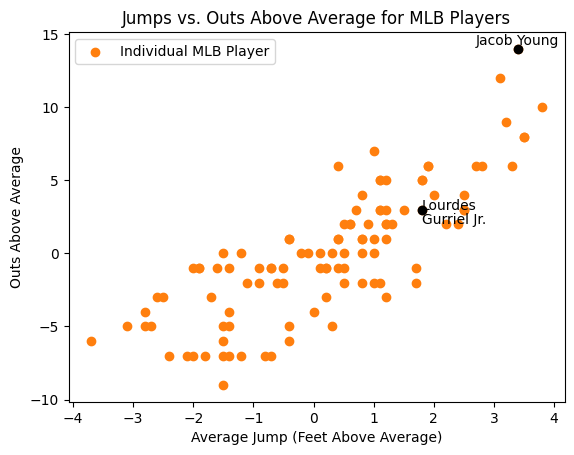

In [215]:
fig, ax = plt.subplots()
ax.scatter(jump_and_speed["rel_league_bootup_distance"], jump_and_speed["outs_above_average"], color = "tab:orange", label = "Individual MLB Player")
ax.set_title("Jumps vs. Outs Above Average for MLB Players")
ax.legend(loc = "upper left")
ax.set_xlabel("Average Jump (Feet Above Average)")
ax.set_ylabel("Outs Above Average")
ax.scatter(3.4, 14, color = "black")
ax.text(2.7, 14.3, "Jacob Young")
ax.scatter(1.8, 3, color = "black")
ax.text(1.8, 3, "Lourdes")
ax.text(1.8, 2, "Gurriel Jr.")

In [216]:
jump_and_speed[(jump_and_speed["sprint_speed"] < 26.85) & (jump_and_speed["outs_above_average"] > 2)]

last_name, first_name  resp_fielder_id  year  outs_above_average  \
38  Gurriel Jr., Lourdes           666971  2024                   3   

    outs_per_play  rel_league_burst_distance  rel_league_reaction_distance  \
38           65.5                        0.7                           1.2   

    rel_league_routing_distance  rel_league_bootup_distance  \
38                         -0.1                         1.8   

    f_bootup_distance  ...  n_outs  player_id  team_id  team position age  \
38               35.6  ...      36     666971      109    AZ       LF  30   

    competitive_runs  bolts  hp_to_1b  sprint_speed  
38               147    NaN       4.6          26.8  

[1 rows x 21 columns]

Text(29.7, 12, 'Young')

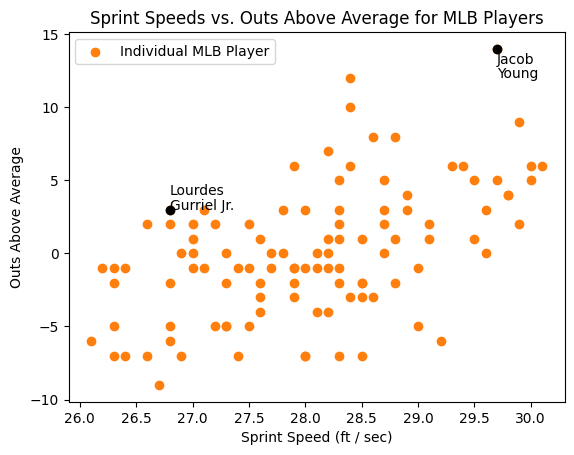

In [217]:
fig, ax = plt.subplots()
ax.scatter(jump_and_speed["sprint_speed"], jump_and_speed["outs_above_average"], color = "tab:orange", label = "Individual MLB Player")
ax.set_title("Sprint Speeds vs. Outs Above Average for MLB Players")
ax.legend(loc = "upper left")
ax.set_xlabel("Sprint Speed (ft / sec)")
ax.set_ylabel("Outs Above Average")
ax.scatter(26.8, 3, color = "black")
ax.text(26.8, 4, "Lourdes")
ax.text(26.8, 3, "Gurriel Jr.")
ax.scatter(29.7, 14, color = "black")
ax.text(29.7, 13, "Jacob")
ax.text(29.7, 12, "Young")

In [218]:
mod = Model.create_model(with_caught)

In [219]:
with_disc_pred = with_caught.assign(pred = list(map(lambda x: x[1], mod.predict_proba(with_caught))))
with_disc_pred["pred"] = np.round(with_disc_pred["pred"] * 20) / 20
hard_only = with_disc_pred[(with_disc_pred["pred"] < 1) & (with_disc_pred["pred"] > .05)]
hard_only

route_obj                game_str  \
3     <Route.Route object at 0x000001A044A642E0>  1883_001_Vis1AB_Home1A   
5     <Route.Route object at 0x000001A044A2E740>  1883_001_Vis1AB_Home1A   
6     <Route.Route object at 0x000001A044A2EBC0>  1883_001_Vis1AB_Home1A   
7     <Route.Route object at 0x000001A044A0F550>  1883_001_Vis1AB_Home1A   
9     <Route.Route object at 0x000001A043DD4970>  1883_001_Vis1AB_Home1A   
...                                          ...                     ...   
8294  <Route.Route object at 0x000001A11E2A9D20>  1884_143_Vis4BE_Home4A   
8295  <Route.Route object at 0x000001A11E2AABC0>  1884_143_Vis4BE_Home4A   
8296  <Route.Route object at 0x000001A11E2ABE80>  1884_143_Vis4BE_Home4A   
8297  <Route.Route object at 0x000001A11E290940>  1884_143_Vis4BE_Home4A   
8298  <Route.Route object at 0x000001A11E2917E0>  1884_143_Vis4BE_Home4A   

      player_id  position level  ideal_length direction  bounce_dist  \
3            -1       8.0    1A     60.843784   forward    60.843784   
5            -1       9.0    1A     82.841640     right    82.841640   
6            -1       8.0    1A     47.603245      left    47.603245   
7            -1       9.0    1A     71.005962      back    71.005962   
9            -1       7.0    1A     68.365437      back    68.365437   
...         ...       ...   ...           ...       ...          ...   
8294       2188       7.0    4A     42.589275      back    42.589275   
8295        502       9.0    4A     53.289710      left    53.289710   
8296       8801       8.0    4A     96.687626      left    96.687626   
8297       6466       9.0    4A     50.863998     right    50.863998   
8298        427       7.0    4A     59.301404   forward    59.301404   

      statcast jump  route efficiency  hang_time  was_caught  pred  
3         46.980509          0.878222       3550        True  0.55  
5         41.098048          0.989837       4500        True  0.80  
6         43.366998          0.913358       3150        True  0.85  
7         34.580992          0.935722       4850        True  0.90  
9         43.007707          0.916099       5750        True  0.95  
...             ...               ...        ...         ...   ...  
8294      36.999996          0.985354       3700        True  0.95  
8295      47.233056          0.984911       3200        True  0.60  
8296      46.816930          0.991299       5300        True  0.95  
8297      18.078479          0.883312       5800        True  0.95  
8298      28.197947          0.976794       4600        True  0.95  

[2459 rows x 13 columns]

Text(0.5, 1.0, 'Box Plots of Jumps for each Play Separated by Farm System Level')

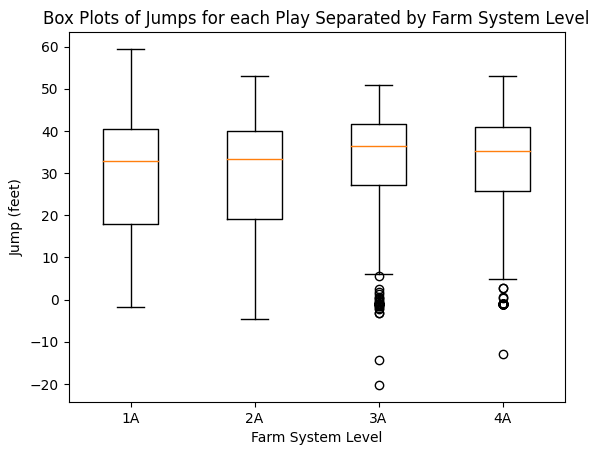

In [220]:
fig, ax = plt.subplots()
ax.boxplot([hard_only[hard_only["level"] == "1A"]["statcast jump"],
           hard_only[hard_only["level"] == "2A"]["statcast jump"],
           hard_only[hard_only["level"] == "3A"]["statcast jump"],
           hard_only[hard_only["level"] == "4A"]["statcast jump"]])
ax.set_xticklabels(["1A", "2A", "3A", "4A"])
ax.set_ylabel("Jump (feet)")
ax.set_xlabel("Farm System Level")
ax.set_title("Box Plots of Jumps for each Play Separated by Farm System Level")

Text(0.5, 0, 'Farm System Level')

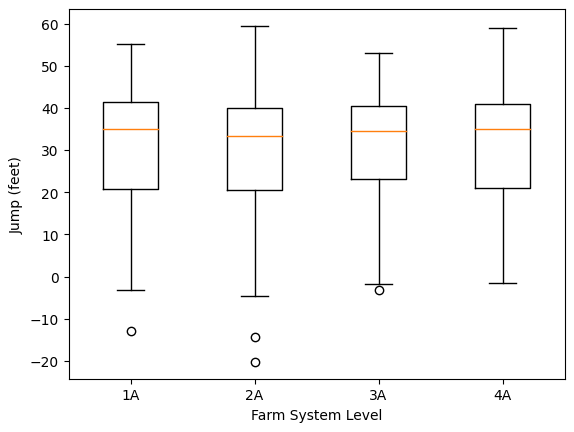

In [221]:
shuffled = hard_only.assign(level = hard_only["level"].sample(frac = 1).to_numpy())
fig, ax = plt.subplots()
ax.boxplot([shuffled[shuffled["level"] == "1A"]["statcast jump"],
           shuffled[shuffled["level"] == "2A"]["statcast jump"],
           shuffled[shuffled["level"] == "3A"]["statcast jump"],
           shuffled[shuffled["level"] == "4A"]["statcast jump"]])
ax.set_xticklabels(["1A", "2A", "3A", "4A"])
ax.set_ylabel("Jump (feet)")
ax.set_xlabel("Farm System Level")

In [222]:
with_disc_pred["binary_pred"] = with_disc_pred["pred"].apply(lambda x: 0 if x < .5 else 1)

In [223]:
with_disc_pred[["route_obj", "was_caught", "binary_pred"]].assign(binary_pred = with_disc_pred["binary_pred"].apply(lambda x: "No Catch" if x == 0 else "Catch")).groupby(["was_caught", "binary_pred"]).count().reset_index().pivot(index="was_caught", columns="binary_pred", values="route_obj")

binary_pred  Catch  No Catch
was_caught                  
False          253      3994
True          3975        77

In [224]:
(399 + 3941)/ (4017 + 230 + 3941 + 111)

0.958910712133992

Text(0.5, 1.0, 'Every Outfield Play')

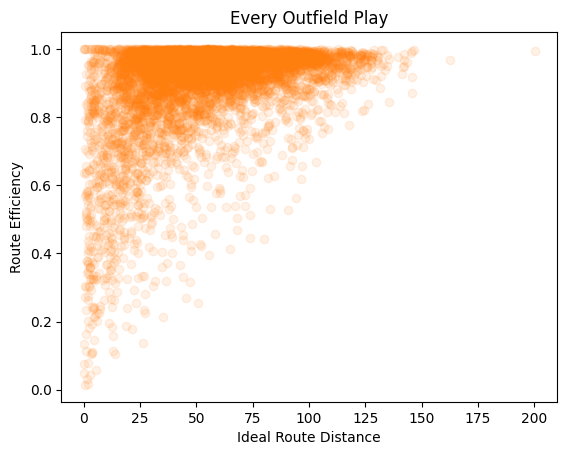

In [233]:
fig, ax = plt.subplots()
ax.scatter(all_routes_df["ideal_length"], all_routes_df["route efficiency"], color = "tab:orange", alpha = 0.1)
ax.set_xlabel("Ideal Route Distance")
ax.set_ylabel("Route Efficiency")
ax.set_title("Every Outfield Play")

In [234]:
Metric.statcast_jump.test_metric()

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 11 of 339
Finished game 21 of 339
Finished game 31 of 339
Finished game 41 of 339
Finished game 51 of 339
Finished game 61 of 339
Finished game 71 of 339
Finished game 81 of 339
Finished game 91 of 339
Finished game 101 of 339
Finished game 111 of 339
no start coords
game skipped
Finished game 121 of 339
Finished game 131 of 339
Finished game 141 of 339
Finished game 151 of 339
Finished game 161 of 339
Finished game 171 of 339
Finished game 181 of 339
Finished game 191 of 339
Finished game 201 of 339
Finished game 211 of 339
Finished game 221 of 339
Finished game 231 of 339
Finished game 241 of 339
Finished game 251 of 339
Finished game 261 of 339
Finished game 271 of 339
Finished game 281 of 339
Finished game 291 of 339
Finished game 301 of 339
Finished game 311 of 339
Finished game 321 of 339
Finished game 331 of 339


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:84: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  relevant = pd.read_csv(game[3]).groupby("play_id").filter(Route.is_relevant())


Out of 1000 permutations, 0 had a test statistic at least as extreme as the observed test statistic.
This give a p-value of 0.0.
This would be considered statistically significant
-----
The observed statistic was 86.2651883381187.
The average test statistic was 55.8034765455645


In [235]:
all_routes_df = Route.get_all_routes_df()

C:\Users\Owner\AppData\Local\Temp\ipykernel_24168\1893315256.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(range(44, 0, -1)), rotation = 70, fontsize = 8)


Text(0.5, 0, 'Average Jump Rank')

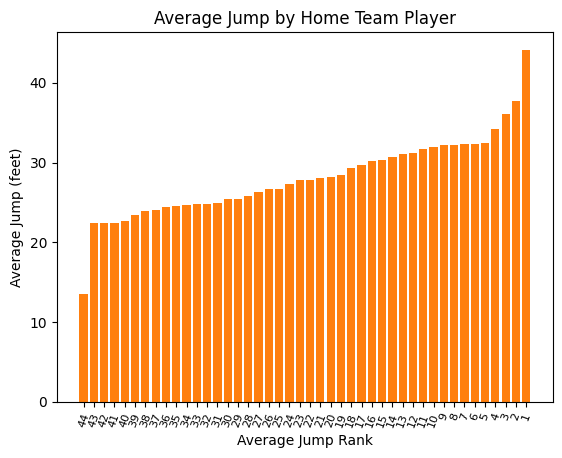

In [272]:
df = all_routes_df[all_routes_df["player_id"].apply(lambda x: len(str(x)) == 3)][["player_id", "statcast jump"]].groupby("player_id").mean().sort_values("statcast jump").reset_index()
fig, ax = plt.subplots()
ax.bar(df["player_id"].apply(str), df["statcast jump"], color = "tab:orange")
ax.set_xticklabels(list(range(44, 0, -1)), rotation = 70, fontsize = 8)
ax.set_title("Average Jump by Home Team Player")
ax.set_ylabel("Average Jump (feet)")
ax.set_xlabel("Average Jump Rank")

C:\Users\Owner\AppData\Local\Temp\ipykernel_24168\2417762986.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(range(44, 0, -1)), rotation = 70, fontsize = 8)


Text(0.5, 0, 'Average Jump Rank')

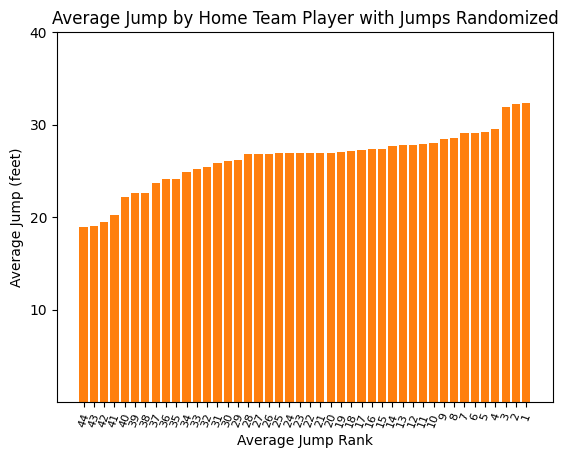

In [277]:
shuffled = all_routes_df.assign(shuffled = all_routes_df["statcast jump"].sample(frac = 1).to_numpy())
shuffled = shuffled[shuffled["player_id"].apply(lambda x: len(str(x)) == 3)][["player_id", "shuffled"]].groupby("player_id").mean().sort_values("shuffled").reset_index()
df = shuffled
fig, ax = plt.subplots()
ax.bar(df["player_id"].apply(str), df["shuffled"], color = "tab:orange")
ax.set_xticklabels(list(range(44, 0, -1)), rotation = 70, fontsize = 8)
ax.set_yticks([10, 20, 30, 40])
ax.set_title("Average Jump by Home Team Player with Jumps Randomized")
ax.set_ylabel("Average Jump (feet)")
ax.set_xlabel("Average Jump Rank")

In [278]:
Metric.route_efficiency.test_metric()

Players cleared
Routes cleared
Starting file search
Files accumulated
Finished game 1 of 339
Finished game 11 of 339
Finished game 21 of 339
Finished game 31 of 339
Finished game 41 of 339
Finished game 51 of 339
Finished game 61 of 339
Finished game 71 of 339
Finished game 81 of 339
Finished game 91 of 339
Finished game 101 of 339
Finished game 111 of 339
no start coords
game skipped
Finished game 121 of 339
Finished game 131 of 339
Finished game 141 of 339
Finished game 151 of 339
Finished game 161 of 339
Finished game 171 of 339
Finished game 181 of 339
Finished game 191 of 339
Finished game 201 of 339
Finished game 211 of 339
Finished game 221 of 339
Finished game 231 of 339
Finished game 241 of 339
Finished game 251 of 339
Finished game 261 of 339
Finished game 271 of 339
Finished game 281 of 339
Finished game 291 of 339
Finished game 301 of 339
Finished game 311 of 339
Finished game 321 of 339
Finished game 331 of 339


c:\Users\Owner\Desktop\coding stuff\smt data challenge\Route.py:84: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  relevant = pd.read_csv(game[3]).groupby("play_id").filter(Route.is_relevant())


Out of 1000 permutations, 354 had a test statistic at least as extreme as the observed test statistic.
This give a p-value of 0.354.
This would NOT be considered statistically signifiant
-----
The observed statistic was 0.47136132617691784.
The average test statistic was 0.45582511678584614


C:\Users\Owner\AppData\Local\Temp\ipykernel_24168\2376864118.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(range(44, 0, -1)), rotation = 70, fontsize = 8)


Text(0.5, 0, 'Average Route Efficiency Rank')

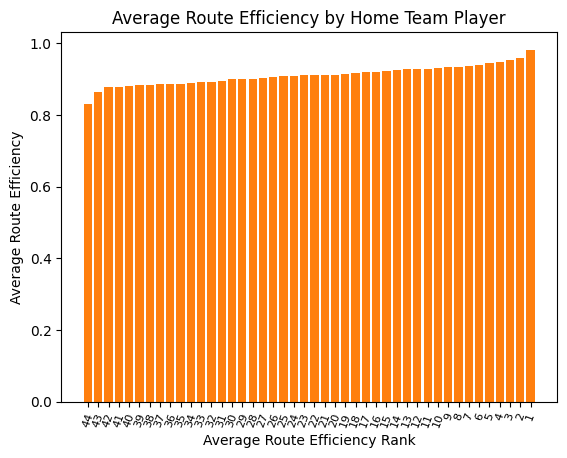

In [281]:
df = all_routes_df[all_routes_df["player_id"].apply(lambda x: len(str(x)) == 3)][["player_id", "route efficiency"]].groupby("player_id").mean().sort_values("route efficiency").reset_index()
fig, ax = plt.subplots()
ax.bar(df["player_id"].apply(str), df["route efficiency"], color = "tab:orange")
ax.set_xticklabels(list(range(44, 0, -1)), rotation = 70, fontsize = 8)
ax.set_title("Average Route Efficiency by Home Team Player")
ax.set_ylabel("Average Route Efficiency")
ax.set_xlabel("Average Route Efficiency Rank")

C:\Users\Owner\AppData\Local\Temp\ipykernel_24168\2430993262.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(range(44, 0, -1)), rotation = 70, fontsize = 8)


Text(0.5, 0, 'Average Route Efficiency Rank')

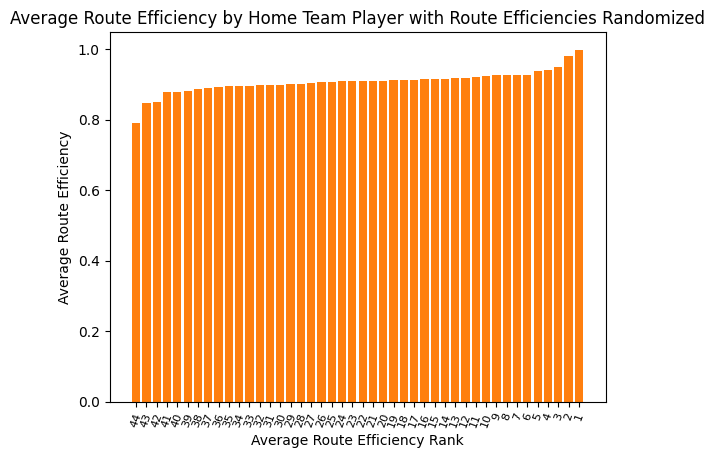

In [285]:
shuffled = all_routes_df.assign(shuffled = all_routes_df["route efficiency"].sample(frac = 1).to_numpy())
shuffled = shuffled[shuffled["player_id"].apply(lambda x: len(str(x)) == 3)][["player_id", "shuffled"]].groupby("player_id").mean().sort_values("shuffled").reset_index()
df = shuffled
fig, ax = plt.subplots()
ax.bar(df["player_id"].apply(str), df["shuffled"], color = "tab:orange")
ax.set_xticklabels(list(range(44, 0, -1)), rotation = 70, fontsize = 8)
ax.set_title("Average Route Efficiency by Home Team Player with Route Efficiencies Randomized")
ax.set_ylabel("Average Route Efficiency")
ax.set_xlabel("Average Route Efficiency Rank")

In [286]:
def find_direction(start, end):
    direcvec = (end[0] - start[0], end[1] - start[1])
    angle = np.arctan2(start[1], start[0]) - np.arctan2(direcvec[1], direcvec[0])
    if angle < 0:
        angle = angle + 2 * np.pi
    if angle <= np.pi / 4 or angle > 7 * np.pi / 4:
        return "back"
    elif angle <= 3 *np.pi / 4:
        return "left"
    elif angle <= 5 * np.pi / 4:
        return "forward"
    else:
        return "right"

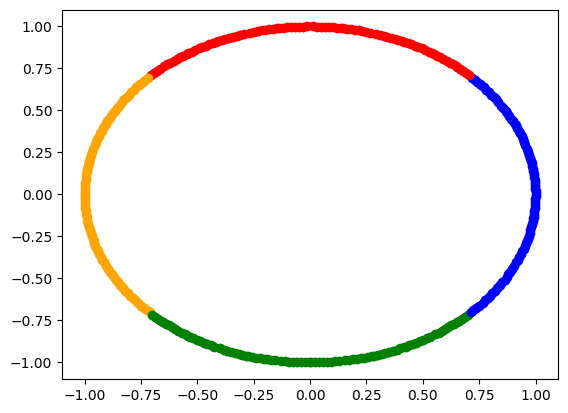

In [290]:
fig, ax = plt.subplots()
colordic = {"forward": "orange",
            "back": "blue",
            "left": "green",
            "right": "red"}
for i in range(360):
    ax.scatter(np.cos(i), np.sin(i), color = colordic[find_direction([0, 0], [np.cos(i), np.sin(i)])])

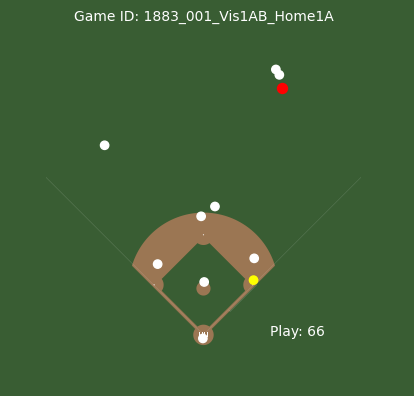

In [298]:
all_routes_df[all_routes_df["direction"] == "right"]["route_obj"].iloc[0].visualize()